In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [13]:
def plot_images(list_of_images, titles=None, figsize=(30, 20)):
    ncols = len(list_of_images)
    fig, axs = plt.subplots(ncols=ncols, nrows=1, figsize=figsize)
    if ncols == 1:
        image = list_of_images[0]
        cmap = 'gray' if (len(image.shape) == 2 or image.shape[2] == 1) else None
        axs.imshow(image, cmap=cmap)
        axs.set_axis_off()
        if titles and len(titles) > 0:
            axs.set_title(titles[0], fontsize=15)
    else:
        for j, ax in enumerate(axs):
            image = list_of_images[j]
            cmap = 'gray' if (len(image.shape) == 2 or image.shape[2] == 1) else None
            ax.imshow(image, cmap=cmap)
            ax.set_axis_off()
            if titles is not None and j < len(titles):
                ax.set_title(titles[j], fontsize=15)
    plt.show()

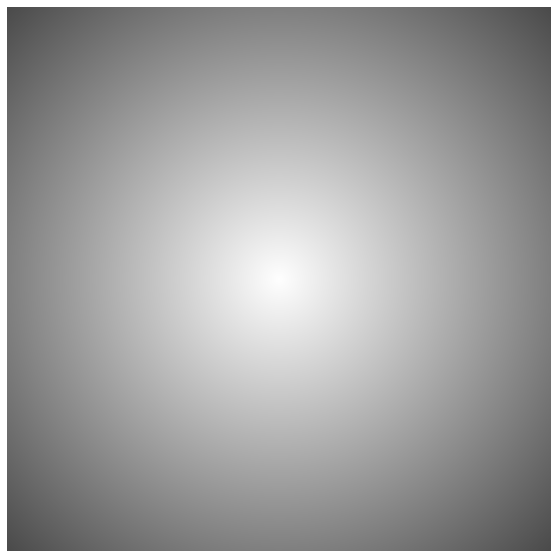

In [96]:
white_img = np.full((1000, 1000, 3), 255, dtype='uint8')
plot_images([vignetting(white_img, (500, 500), 2, 1, 1)], figsize=(10, 10))

In [142]:
norma = 1
n = 5
xs = np.arange(0, 1000)
yx = np.arange(0, 1000)
grid = np.dstack([yx, xs])
h, w = grid.shape[:2]
grid = (grid - (500, 500)) / (h / n, w / n)

grid = (np.abs(grid)**norma).sum(axis=2)**(1/norma)
grid -= grid.min()
grid *= 255
grid = grid.astype('uint8')

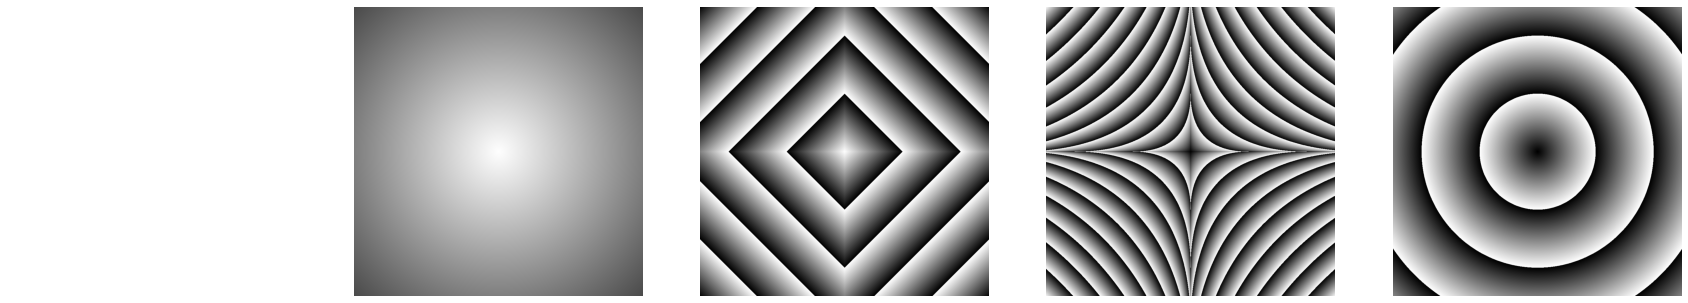

In [151]:
def vignetting(img, center, norma = 0.9, scale = 1, do_inv=True):
    result_img = img.copy()
    h, w = img.shape[:2]
    cy, cx = center
    xs = np.arange(0, w)
    yx = np.arange(0, h)
    widths, heights = np.meshgrid(xs, yx)
    idxs = np.stack([widths, heights], axis=2)
    mask = ((np.abs(idxs - (cx, cy)) / (w / scale, h / scale)) ** norma).sum(axis=2)**(1 / norma)
    if do_inv:
        mask = 1 - mask
    return (np.stack([mask]*3, axis=2) * img).astype('uint8')
    

plot_images([white_img, 
             vignetting(white_img, (500, 500), 2, 1, 1), 
             vignetting(white_img, (500, 500), 1, 5, 1), 
             vignetting(white_img, (500, 500), 0.5, 5, 0), 
             vignetting(white_img, (500, 500), 2, 5, 0)
            ])

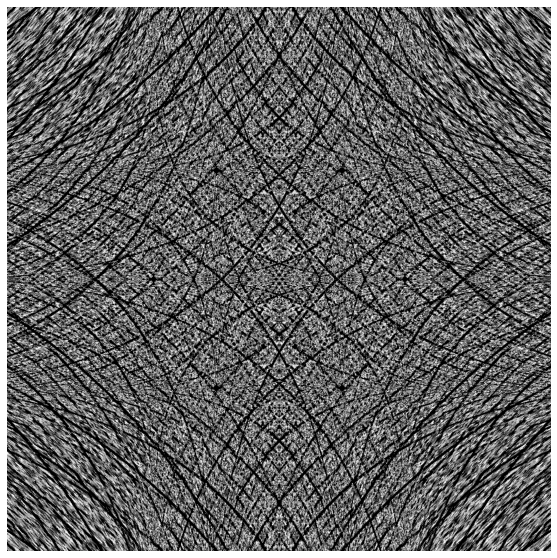

In [149]:
r = 200
R = 2*r/(3**0.5)
cx = cy = 500
p1 = (cx - r, cy+R/2)
p2 = (cx - r, cy-R/2)
p3 = (cx + r, cy+R/2)
p4 = (cx + r, cy-R/2)
p5 = (cx, cy+R)
p6 = (cx, cy-R)
ps = np.stack([p1, p2, p3, p4, p5, p6])

ims = np.stack([vignetting(white_img, p, 0.5, 0.3, 0) for p in ps])
r = np.prod(ims, axis=0).astype('uint8')
plot_images([r], figsize=(10, 10))